## Analysis of the reproducibility of y-ion intensities

### Notes

As it stands, we only have measured spectra for ~5000 silace pairs. This is only a quarter of the ~20000 unique peptides measured accross the silace runs. This means, no matter what type of analysis we do, we may need to impute what the y-ions look like for the other isotope. Here, I will analyze how reproducible these measurements are in the pairs that we have measured, which will justify the imputations.

In [95]:
from sdia import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [137]:
slib = SpectralLibrary.from_csv("../Data/spectral_library/filtered_silac_library", is_silac=True)
slib.library = slib.library.drop_duplicates(subset=["isotope", "name"], keep=False)

In [138]:
ion_intensities = slib.library.reset_index().set_index(["peptide", "isotope", "name"]).intensity

In [139]:
ion_intensities.loc["AAADALSDLEIK/2"]

isotope              name  
AAADALSDLEIK/2       y3          907.2
                     y4         1725.5
                     y4i         372.4
                     y5         1513.1
                     y5i         383.8
                     y6        10000.0
                     y6i        2811.6
                     y7-18       197.8
                     y7         7050.2
                     y7i        2804.8
                     y8         5496.2
                     y8i        2236.3
                     y9-18       278.3
                     y9         6460.9
                     y10-18      421.1
                     y10        5783.7
                     y11         458.0
AAADALSDLEIK[136]/2  y3-18       604.2
                     y3          787.5
                     y4         1815.3
                     y5         1622.2
                     y6-18       235.4
                     y6        10000.0
                     y6i        2268.5
                     y7         7201

It's the fault of spectrast that there are multiple duplicates of peaks with "i" in the name above. It only differentiates between the monoisotopic peak and not. So I will continue this analysis with only the monoisotopic peaks to be safe.

In [140]:
contain_i = slib.library.name.str.contains("i")
ion_intensities = slib.library[~contain_i].reset_index().set_index(["peptide", "isotope", "name"]).intensity

In [141]:
first_spectra = ion_intensities.loc["AAADALSDLEIK/2"].unstack("isotope")
first_spectra

isotope,AAADALSDLEIK/2,AAADALSDLEIK[136]/2
name,,
y3,907.2,787.5
y4,1725.5,1815.3
y5,1513.1,1622.2
y6,10000.0,10000.0
y7-18,197.8,NaN
y7,7050.2,7201.5
y8,5496.2,5758.9
y9-18,278.3,NaN
y9,6460.9,6687.5


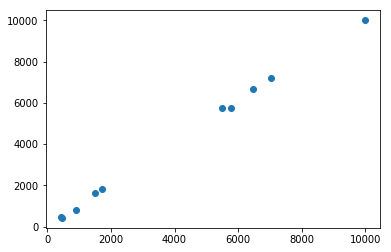

In [142]:
plt.scatter(first_spectra.iloc[:,0], first_spectra.iloc[:,1])

In [143]:
def rank_corr(df):
    try:
        return df.unstack("isotope").corr("spearman").iloc[0,1]
    except:
        return None

In [144]:
corr = ion_intensities.groupby("peptide").apply(rank_corr)

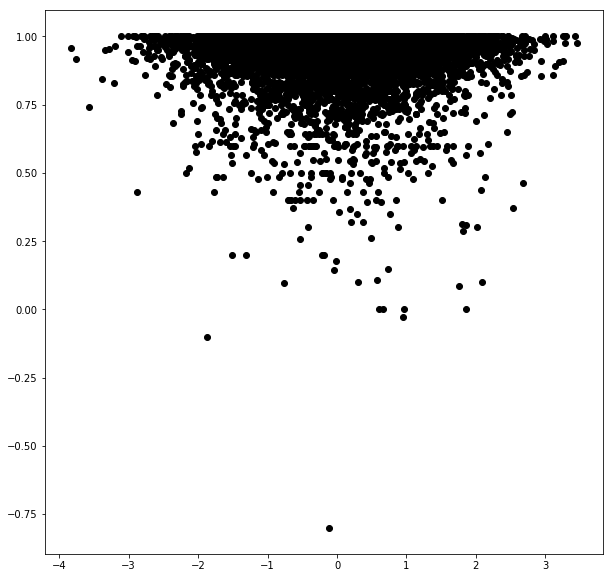

In [148]:
plt.figure(figsize=(10, 10))
plt.scatter(np.random.randn(corr.shape[0]), corr.values.flatten(),
            c = "black")

In [149]:
corr.shape

(9795,)